# Task management

A **task/process** is a program that is being executed.

**Program**: A static entity in the form of an executable file

**Process**: A dynamic entity that captures the notion of a program execution



We use the process model because it simplifies design since system design is performed at the process level, which is a clean level of abstraction.

Process control block (PCB) keeps the information of each process:
* Pointer
* Process state
* Process number (PID)
* Program counter (pointer to next instruction)
* CPU registers
* Memory management info
* Info about open files

In multi-programmed systems, each process has its own PCB in the memory.

## Process state

As a process executes, its state will change, and will be one of the following:
* created: Immediately after creation
* running: Instructions are being ran
* blocked/waiting: Process is waiting for some event to occur
* ready: Process is ready to be assigned to CPU
* terminated: Process has completed execution

The following is the [finite-state machine](../digital_design/finite_state_machine.ipynb) of the process state:

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
G.add_node("created", pos=(0, 0))
G.add_node("ready", pos=(2, 0))
G.add_node("blocked", pos=(3, 1))
G.add_node("running", pos=(4, 0))
G.add_node("terminated", pos=(6, 0))
G.add_edge("created", "ready")
G.add_edge("ready", "running")
G.add_edge("running", "ready")
G.add_edge("blocked", "ready")
G.add_edge("running", "blocked")
G.add_edge("running", "terminated")

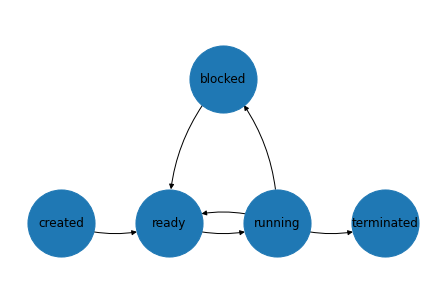

In [2]:
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=4500, connectionstyle="arc3,rad=0.2" )
plt.xlim(-1, 7)
plt.ylim(-0.5, 1.5)
plt.show()

### Created

This is the initial state of the process, after the OS initialize the PCB of the process.
It does not compete for CPU with other processes.

### Ready
it is willing to execute, and thus is competing for CPU with other processes, however there is no available processor to execute it.

### Running
A processor can only have 1 running process at a time.
Transition from ready to running is controlled by OS scheduler.

### Blocked

Process does not compete for CPU when blocked.

### Terminated

Process can no longer be executed.

PCB still available to other processes to examine the info on it, _eg_ to determine what is the cause of termination.


The PCB will eventually be removed from the system.

## Transitions

### Running $\to$ Ready

This could be caused by:
* Preemption
    * Involuntary
    * OS scheduler forces the process to relinquish the processor
* Yield
    * Voluntary
    * Process itself asks the OS to reconsider scheduling decision, and willingly hands over the processor to another process

### Ready $\to$ Blocked
Could be due to:
* Awaiting for I/O completion
* Synchronization with other processes
* Communication with other processes

### Blocked $\to$ Ready

For I/O events, the ISR moves the process into the ready state.

For synchronization/communication, the OS moves the process to the ready state.

### Running $\to$ Terminated
Voluntary: Process complete execution and is no longer needed

Involuntary: Process encounters unrecoverable error.

## Context switch

When a CPU switches to another process, the system must save the context of the old process and load the context for the new process.

The context switch has an overhead time associated with it.

In a system, usually most tasks are in blocked state and waiting for some event to occur.

Once an event occurs, then it triggers the interrupt.
The ISR then cause some tasks to be unblocked.

## CPU scheduler

CPU scheduler is responsible for deciding:
* which process should be executed at any given time by the CPUs
* how long each process should be allowed to execute

CPU scheduling decisions may occur when a process changes state.

### Preemptive vs non-preemptive

Non-preemptive: once a CPU is allocated to a process, the process keeps the CPU until it voluntarily relinquishes it.

Preemptive: the CPU can be relinquished from the process by the OS at any time.

## Threads

Thus far, each process has a single flow of control.

Multi-threading: Multiple flow of control within a single process. These flows of controls are known as **thread**.

A thread is a basic unit of CPU utilization, consisting of:
* a thread ID
* program counter
* register set
* stack space


Each thread in the same process shares the following with its peer threads:
* code section
* data section
* OS resources

Hence, threads can be thought of another way of doing multiple things at once, at the layer below multi-processing.